In [38]:
import os
import cv2
from matplotlib import pyplot as plt

# Define paths
input_folder = 'Yolo format/obj_train_data'  # Change this to your input folder path
output_folder = os.path.join(input_folder, 'new_output')
obj_names_path = 'Yolo format/obj.names'  # Change this to your obj_names file path

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to read class labels from obj_names file
def read_class_labels(obj_names_path):
    with open(obj_names_path, 'r') as file:
        class_labels = file.read().splitlines()
    # Exchange class labels to meet the requirement
    class_labels[0], class_labels[1] = class_labels[1], class_labels[0]
    return class_labels

# Function to draw bounding boxes and labels on the image
def draw_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
            class_id = int(class_id)
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))
            x_max = int(x_center + (box_width / 2))
            y_max = int(y_center + (box_width / 2))

            # Draw the rectangle on the image
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Put class label text on the image
            label = class_labels[class_id]
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

# Read class labels from obj_names file
class_labels = read_class_labels(obj_names_path)

# Process each image and its corresponding annotation
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            annotated_image = draw_bounding_boxes(image_path, annotation_path, class_labels)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, annotated_image)
            print(f'Saved annotated image: {output_path}')

print('Processing complete.')

Saved annotated image: Yolo format/obj_train_data\new_output\frame_000000.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000001.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000002.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000003.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000004.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000005.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000006.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000007.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000008.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000009.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000010.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000011.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\fra

In [39]:
# Create separate folders for each class if they don't exist
motorcycle_folder = os.path.join(output_folder, 'motorcycles')
saloon_cars_folder = os.path.join(output_folder, 'saloon_cars')

if not os.path.exists(motorcycle_folder):
    os.makedirs(motorcycle_folder)

if not os.path.exists(saloon_cars_folder):
    os.makedirs(saloon_cars_folder)

# Function to crop and save image patches
def crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, count):
    cropped_image = image[y_min:y_max, x_min:x_max]
    if class_id == 0:
        output_path = os.path.join(motorcycle_folder, f'motorcycle_{count}_{filename}')
    elif class_id == 1:
        output_path = os.path.join(saloon_cars_folder, f'saloon_cars_{count}_{filename}')
    cv2.imwrite(output_path, cropped_image)
    print(f'Saved cropped image: {output_path}')

# Initialize a counter for each class to ensure unique filenames
motorcycles_count = 0
saloon_cars_count = 0

# Process each image and its corresponding annotation to crop and save patches
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            image = cv2.imread(image_path)
            height, width, _ = image.shape

            with open(annotation_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
                    class_id = int(class_id)
                    x_center *= width
                    y_center *= height
                    box_width *= width
                    box_height *= height

                    x_min = int(x_center - (box_width / 2))
                    y_min = int(y_center - (box_height / 2))
                    x_max = int(x_center + (box_width / 2))
                    y_max = int(y_center + (box_width / 2))

                    # Crop and save the image patch
                    if class_id == 0:
                        motorcycles_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, motorcycles_count)
                    elif class_id == 1:
                        saloon_cars_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, saloon_cars_count)

print('Cropping and saving complete.')


Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_1_frame_000000.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_2_frame_000000.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_3_frame_000001.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_4_frame_000001.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_5_frame_000002.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_6_frame_000002.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_7_frame_000003.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_8_frame_000003.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_9_frame_000004.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars

In [130]:
import os
import cv2

# Define paths
input_folder = 'Yolo format/obj_train_data'  # Change this to your input folder path
output_folder = os.path.join(input_folder, 'new_output')
obj_names_path = 'Yolo format/obj.names'  # Change this to your obj_names file path

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to read class labels from obj_names file
def read_class_labels(obj_names_path):
    with open(obj_names_path, 'r') as file:
        class_labels = file.read().splitlines()
    # Ensure "saloon cars" is first and "motorcycles" is second
    if class_labels[0] != "saloon cars":
        class_labels[0], class_labels[1] = class_labels[1], class_labels[0]
    return class_labels

# Function to draw bounding boxes and labels on the image
def draw_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
            class_id = int(class_id)
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))
            x_max = int(x_center + (box_width / 2))
            y_max = int(y_center + (box_width / 2))

            # Draw the rectangle on the image
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Put class label text on the image
            label = class_labels[class_id]
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

# Read class labels from obj_names file
class_labels = read_class_labels(obj_names_path)

# Process each image and its corresponding annotation
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            annotated_image = draw_bounding_boxes(image_path, annotation_path, class_labels)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, annotated_image)
            print(f'Saved annotated image: {output_path}')

print('Processing complete.')

# Create separate folders for each class if they don't exist
saloon_cars_folder = os.path.join(output_folder, 'saloon_cars')
motorcycles_folder = os.path.join(output_folder, 'motorcycles')

if not os.path.exists(saloon_cars_folder):
    os.makedirs(saloon_cars_folder)

if not os.path.exists(motorcycles_folder):
    os.makedirs(motorcycles_folder)

# Function to crop and save image patches
def crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, count):
    cropped_image = image[y_min:y_max, x_min:x_max]
    if class_id == 0:
        output_path = os.path.join(saloon_cars_folder, f'saloon_cars_{count}_{filename}')
    elif class_id == 1:
        output_path = os.path.join(motorcycles_folder, f'motorcycles_{count}_{filename}')
    cv2.imwrite(output_path, cropped_image)
    print(f'Saved cropped image: {output_path}')

# Initialize a counter for each class to ensure unique filenames
saloon_cars_count = 0
motorcycles_count = 0

# Process each image and its corresponding annotation to crop and save patches
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            image = cv2.imread(image_path)
            height, width, _ = image.shape

            with open(annotation_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
                    class_id = int(class_id)
                    x_center *= width
                    y_center *= height
                    box_width *= width
                    box_height *= height

                    x_min = int(x_center - (box_width / 2))
                    y_min = int(y_center - (box_height / 2))
                    x_max = int(x_center + (box_width / 2))
                    y_max = int(y_center + (box_width / 2))

                    # Crop and save the image patch
                    if class_id == 0:
                        saloon_cars_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, saloon_cars_count)
                    elif class_id == 1:
                        motorcycles_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, motorcycles_count)

print('Cropping and saving complete.')


Saved annotated image: Yolo format/obj_train_data\new_output\frame_000000.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000001.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000002.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000003.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000004.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000005.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000006.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000007.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000008.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000009.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000010.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000011.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\fra

In [41]:
import os
import cv2
import numpy as np

# Define paths
dataset_folder = os.path.join(output_folder, 'dataset')

# Create the dataset folder if it doesn't exist
if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

# Create separate folders for each class in the dataset folder
dataset_saloon_cars_folder = os.path.join(dataset_folder, 'saloon_cars')
dataset_motorcycles_folder = os.path.join(dataset_folder, 'motorcycles')

if not os.path.exists(dataset_saloon_cars_folder):
    os.makedirs(dataset_saloon_cars_folder)

if not os.path.exists(dataset_motorcycles_folder):
    os.makedirs(dataset_motorcycles_folder)

# Function to preprocess images
def preprocess_and_save(input_folder, output_folder, class_name):
    for filename in os.listdir(input_folder):
        if filename.endswith('.PNG'):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (224, 224))  # Resize to 224x224 pixels
            normalized_image = resized_image / 255.0  # Scale pixel values to between 0 and 1

            # Save the processed image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, (normalized_image * 255).astype(np.uint8))  # Convert back to uint8
            print(f'Saved processed image: {output_path}')

# Preprocess and save images for each class
preprocess_and_save(saloon_cars_folder, dataset_saloon_cars_folder, 'saloon_cars')
preprocess_and_save(motorcycles_folder, dataset_motorcycles_folder, 'motorcycles')

print('Preprocessing complete.')


Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1000_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1000_frame_001076.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1001_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1001_frame_001077.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1002_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1002_frame_001078.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1003_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1003_frame_001079.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars

In [131]:
# loading the Dataset pipeline using kera library
import tensorflow as tf
dataset_new = tf.keras.utils.image_dataset_from_directory('Yolo format/dataset',batch_size = 32,image_size = (224,224))

Found 7037 files belonging to 2 classes.


In [132]:
data_iterator=dataset_new.as_numpy_iterator()

In [133]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001AECBBB5790>)

In [134]:
batch = data_iterator.next()

In [135]:
# Images represented as numpy arrays
batch[0].shape

(32, 224, 224, 3)

In [136]:
# Displaying the labels
batch[1]
# CLASS 0= motorcysles 
# CLASS 1 = saloon cars

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [137]:
#Applying the Data scaling transformation on the data pipeline
scaled_data =dataset_new.map(lambda x,y: (x/255,y)) 

In [138]:
# We have successfully scaled the images between 0 and 1
scaled_data.as_numpy_iterator().next()[0].min()

0.047058824

In [139]:
scaled_iterator=scaled_data.as_numpy_iterator()
scaled_iterator.next()

(array([[[[0.47058824, 0.49019608, 0.46666667],
          [0.47058824, 0.49019608, 0.46666667],
          [0.47058824, 0.49019608, 0.46666667],
          ...,
          [0.53333336, 0.53333336, 0.5137255 ],
          [0.53333336, 0.53333336, 0.5137255 ],
          [0.53333336, 0.53333336, 0.5137255 ]],
 
         [[0.47058824, 0.49019608, 0.46666667],
          [0.47058824, 0.49019608, 0.46666667],
          [0.47058824, 0.49019608, 0.46666667],
          ...,
          [0.53333336, 0.53333336, 0.5137255 ],
          [0.53333336, 0.53333336, 0.5137255 ],
          [0.53333336, 0.53333336, 0.5137255 ]],
 
         [[0.47058824, 0.49019608, 0.46666667],
          [0.47058824, 0.49019608, 0.46666667],
          [0.47058824, 0.49019608, 0.46666667],
          ...,
          [0.53333336, 0.53333336, 0.5137255 ],
          [0.53333336, 0.53333336, 0.5137255 ],
          [0.53333336, 0.53333336, 0.5137255 ]],
 
         ...,
 
         [[0.54901963, 0.50980395, 0.47058824],
          [0.54901

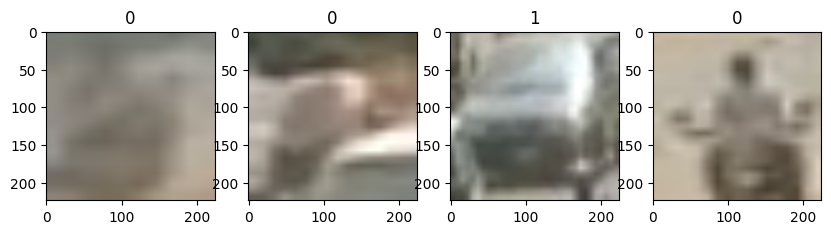

In [140]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [141]:
# Splitting the dataset into training and validation sets 
len(scaled_data)

220

In [142]:
train_size = int(0.8 * len(scaled_data))
test_size = int(0.2 * len(scaled_data))

In [143]:
train_size 

176

In [144]:
test_size

44

In [145]:
train =scaled_data.take(train_size)
test=scaled_data.skip(test_size).take(test_size)

In [146]:
len(train)

176

In [157]:
len(test)

44

In [172]:
#  CNN MODEL BUILDING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, kernel_size=(3, 3),  activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [173]:
# compile the model
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [174]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,121 (10.60 MB)

 Trainable params: 2,779,121 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

In [175]:
 logdir = 'Yolo format/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [176]:
hist= model.fit(train, validation_data=test, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.7812 - loss: 0.5098 - val_accuracy: 0.9574 - val_loss: 0.1306
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 257ms/step - accuracy: 0.9489 - loss: 0.1568 - val_accuracy: 0.9652 - val_loss: 0.1200
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.9624 - loss: 0.1127 - val_accuracy: 0.9680 - val_loss: 0.0921
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 52s 295ms/step - accuracy: 0.9693 - loss: 0.0956 - val_accuracy: 0.9744 - val_loss: 0.0706
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.9758 - loss: 0.0717 - val_accuracy: 0.9688 - val_loss: 0.0840


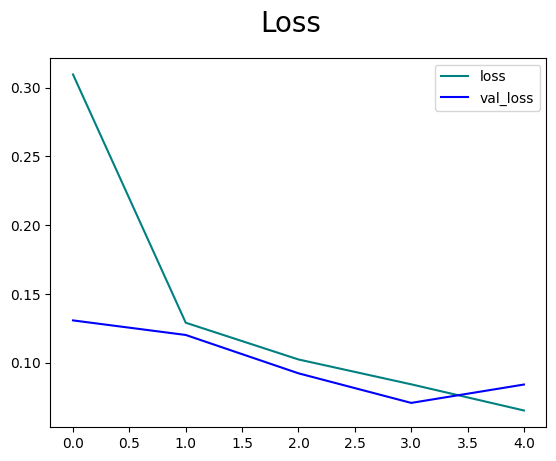

In [177]:
# plot performance
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'blue',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

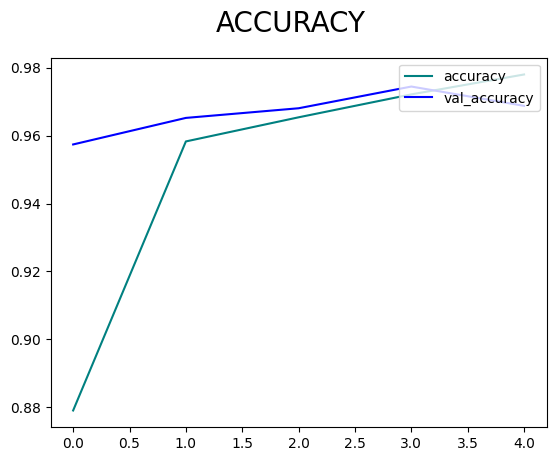

In [178]:
# plot performance
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'blue',label = 'val_accuracy')
fig.suptitle('ACCURACY',fontsize=20)
plt.legend(loc='upper right')
plt.show()  

In [179]:
#Model evalaution
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [180]:
Pre = Precision()
Rec = Recall()
Acc=BinaryAccuracy()

In [211]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    Pre.update_state(y,y_pred)
    Rec.update_state(y,y_pred)
    Acc.update_state(y,y_pred)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision:0.6420149803161621,Recall:0.7843736410140991,Accuracy:0.7884615659713745,F1_SCORE:0.7060903445471803
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision:0.6389968395233154,Recall:0.7854971885681152,Accuracy:0.7865990996360779,F1_SCORE:0.7047137115610147
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.6360461115837097,Recall:0.7866090536117554,Accuracy:0.7847533822059631,F1_SCORE:0.7033603550700447
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
Precision:0.6341968774795532,Recall:0.7879828214645386,Accuracy:0.7833426594734192,F1_SCORE:0.7027751131842226
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.6310214996337891,Recall:0.7889790534973145,Accuracy:0.7813888788223267,F1_SCORE:0.7012148765076192
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.6265630125999451,Recall:0.7896081805229187,Accuracy:0.7788993120193481,F1_SCORE:0.6986998414522919
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
Precision:0.6238716244697571,Recall:0.7906779646873474,Accuracy:0.7771200537

In [228]:
#BUILDING AN LNET5 CNN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the LeNet-5 architecture
model3 = Sequential()

# C1: Convolutional Layer
model3.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3), padding='same'))

# S2: Average Pooling Layer
model3.add(AveragePooling2D(pool_size=(2, 2)))

# C3: Convolutional Layer
model3.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same'))

# S4: Average Pooling Layer
model3.add(AveragePooling2D(pool_size=(2, 2)))

# C5: Convolutional Layer (typically in LeNet-5 this layer is fully connected but we'll use Conv2D to match the input shape)
model3.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))

# Flatten the feature maps
model3.add(Flatten())

# C5: Fully Connected Layer
model3.add(Dense(120, activation='relu'))

# F6: Fully Connected Layer
model3.add(Dense(84, activation='relu'))

# Output Layer
model3.add(Dense(1, activation='sigmoid'))  # Use 'softmax' and adjust units for multi-class classification

# Compile the model
model3.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])


In [229]:
# Print the model summary
model3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_192 (Conv2D)             │ (None, 224, 224, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_8             │ (None, 112, 112, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_193 (Conv2D)             │ (None, 112, 112, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_9             │ (None, 56, 56, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_194 (Conv2D)             │ (None, 52, 52, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 324480)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 120)            │    38,937,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,998,961 (148.77 MB)

 Trainable params: 38,998,961 (148.77 MB)

 Non-trainable params: 0 (0.00 B)

In [230]:
# Train the LNET5 model
hist3 = model3.fit(train, validation_data=test, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 71s 371ms/step - accuracy: 0.7957 - loss: 0.4726 - val_accuracy: 0.9524 - val_loss: 0.1431
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 67s 379ms/step - accuracy: 0.9364 - loss: 0.1811 - val_accuracy: 0.9553 - val_loss: 0.1365
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 93s 525ms/step - accuracy: 0.9506 - loss: 0.1468 - val_accuracy: 0.9645 - val_loss: 0.1046
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 89s 504ms/step - accuracy: 0.9639 - loss: 0.1159 - val_accuracy: 0.9709 - val_loss: 0.0796
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 79s 447ms/step - accuracy: 0.9691 - loss: 0.1007 - val_accuracy: 0.9680 - val_loss: 0.0899
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 69s 394ms/step - accuracy: 0.9696 - loss: 0.0888 - val_accuracy: 0.9766 - val_loss: 0.0618
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 69s 390ms/step - accuracy: 0.9759 - loss: 0.0691 - val_accuracy: 0.9801 - val_loss: 0.0539
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 75s 422ms/step - accuracy: 0.9814 - loss: 0

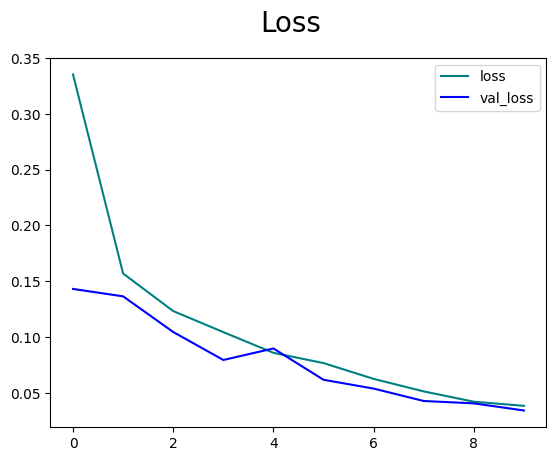

In [231]:
# plot performance of LNET5
fig = plt.figure()
plt.plot(hist3.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist3.history['val_loss'],color = 'blue',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

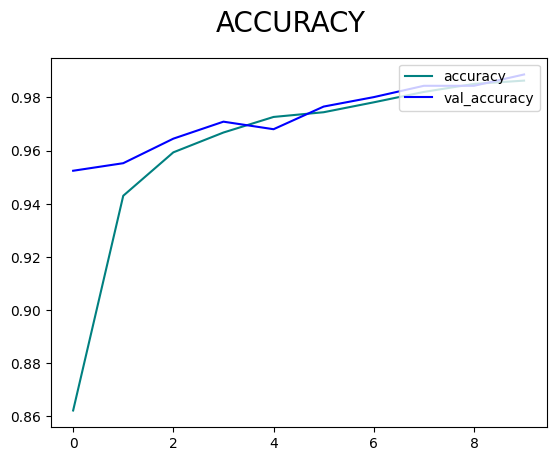

In [232]:
# plot performance of LNET5
fig = plt.figure()
plt.plot(hist3.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist3.history['val_accuracy'],color = 'blue',label = 'val_accuracy')
fig.suptitle('ACCURACY',fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [233]:
# Model Evaluation
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model3.predict(X)
    Pre.update_state(y,y_pred)
    Rec.update_state(y,y_pred)
    Acc.update_state(y,y_pred)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision:0.7695231437683105,Recall:0.7742496132850647,Accuracy:0.8525612354278564,F1_SCORE:0.7718792065299244
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Precision:0.7697883248329163,Recall:0.77451092004776,Accuracy:0.8527371883392334,F1_SCORE:0.7721424049565399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Precision:0.7700528502464294,Recall:0.7747716307640076,Accuracy:0.8529126644134521,F1_SCORE:0.7724049992719305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Precision:0.7703958749771118,Recall:0.775020182132721,Accuracy:0.8530505895614624,F1_SCORE:0.7727010951188262
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Precision:0.7706853151321411,Recall:0.7753055095672607,Accuracy:0.8532253503799438,F1_SCORE:0.7729885414209631
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Precision:0.7709215879440308,Recall:0.7755383849143982,Accuracy:0.8533996343612671,F1_SCORE:0.7732231342780802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Precision:0.7711312174797058,Recall:0.7757450342178345,Accuracy:0.8

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━

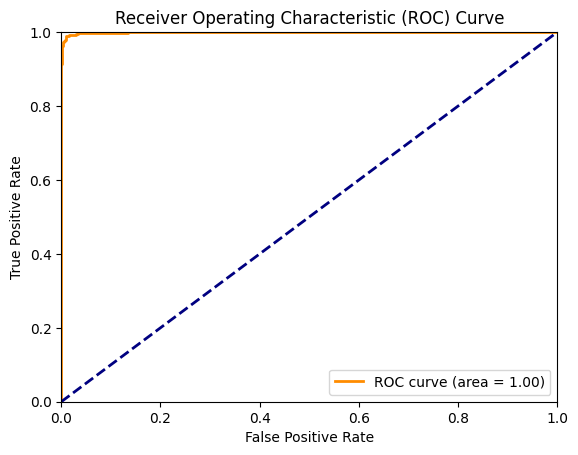

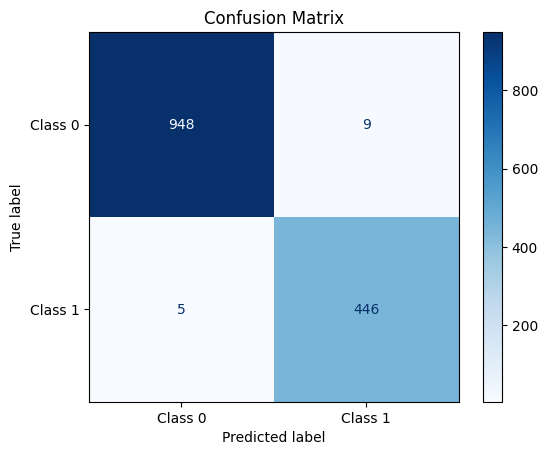

Processing complete.


In [239]:
# Compute confusion matrix FOR LNET5
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
y_true1 = []
y_pred_prob1 = []
y_pred_class = []

# Loop through your test batches
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model3.predict(X)

    # Append the true labels and predicted probabilities to the lists
    y_true1.extend(y)
    y_pred_prob1.extend(y_pred)
    
    # Convert predicted probabilities to class labels (assuming a threshold of 0.5 for binary classification)
    y_pred_class.extend(np.where(y_pred > 0.5, 1, 0))

    # Update metrics (optional, based on your existing code)
    Pre.update_state(y, y_pred)
    Rec.update_state(y, y_pred)
    Acc.update_state(y, y_pred)

# Convert lists to numpy arrays
y_true = np.array(y_true1)
y_pred_prob = np.array(y_pred_prob1)
y_pred_class = np.array(y_pred_class)

# Calculate F1 score (optional, based on your existing code)
F1_SCORE = 2 * (Pre.result().numpy() * Rec.result().numpy()) / (Pre.result().numpy() + Rec.result().numpy())

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob1)
roc_auc1 = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('Processing complete.')

In [200]:
# BUILDING A RESNET CNN
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Function to create a residual block
def residual_block(x, filters, kernel_size=3, stride=1, activation='relu'):
    y = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation(activation)(y)
    
    y = Conv2D(filters, kernel_size, strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    
    if stride != 1 or x.shape[-1] != filters:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)
    
    out = Add()([x, y])
    out = Activation(activation)(out)
    return out

# Input layer
input_layer = Input(shape=(224, 224, 3))

# Initial convolutional layer
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add residual blocks
x = residual_block(x, 64)
x = residual_block(x, 64)

x = residual_block(x, 128, stride=2)
x = residual_block(x, 128)

x = residual_block(x, 256, stride=2)
x = residual_block(x, 256)

x = residual_block(x, 512, stride=2)
x = residual_block(x, 512)

# Final layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
model4 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model4.summary()

Model: "functional_110"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_12[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_55[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 56, 56,    │          0 │ activation_17[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_28… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_56[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_18[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_57[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 56, 56,    │          0 │ max_pooling2d_28… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 56, 56,    │          0 │ add_8[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_19[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_58[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_20[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_59[0][0] 

 Total params: 17,613,953 (67.19 MB)

 Trainable params: 17,604,353 (67.16 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [221]:
# Train the RESNET model
hist3 = model4.fit(train, validation_data=test, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 734s 4s/step - accuracy: 0.9955 - loss: 0.0214 - val_accuracy: 0.9446 - val_loss: 0.3860
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 702s 4s/step - accuracy: 0.9926 - loss: 0.0280 - val_accuracy: 0.9545 - val_loss: 0.3796
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.9897 - loss: 0.0363 - val_accuracy: 0.9801 - val_loss: 0.0984
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.9955 - loss: 0.0192 - val_accuracy: 0.9787 - val_loss: 0.0540
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9964 - val_loss: 0.0100


In [240]:
# Model Evaluation for RESNET
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred2 = model4.predict(X)
    Pre.update_state(y,y_pred2)
    Rec.update_state(y,y_pred2)
    Acc.update_state(y,y_pred2)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Precision:0.8194895386695862,Recall:0.8251346945762634,Accuracy:0.8853882551193237,F1_SCORE:0.8223024203637722
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
Precision:0.8196160793304443,Recall:0.8252581357955933,Accuracy:0.8854922652244568,F1_SCORE:0.8224274099420903
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
Precision:0.8197740316390991,Recall:0.8254122138023376,Accuracy:0.8855960965156555,F1_SCORE:0.822583466405117
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.8199317455291748,Recall:0.8255660533905029,Accuracy:0.8856997489929199,F1_SCORE:0.8227392802777511
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
Precision:0.8201520442962646,Recall:0.8257809281349182,Accuracy:0.8858031630516052,F1_SCORE:0.8229569222644083
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Precision:0.8203874826431274,Recall:0.826010525226593,Accuracy:0.8859063982963562,F1_SCORE:0.8231894054212486
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Precision:0.8204412460327148,Recall:0.8261327743530273,Accuracy:0.885

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

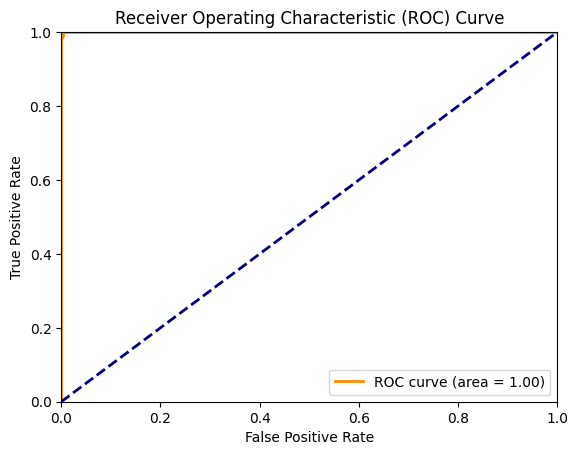

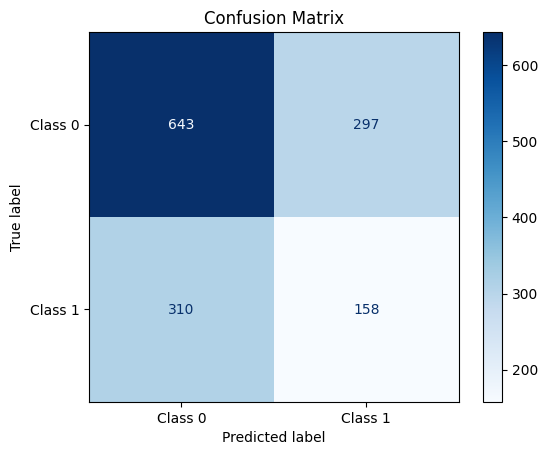

Processing complete.


In [245]:
# CONFUSION MATRIX FOR RESNET AND AUC
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
y_true = []
y_pred_prob = []
y_pred_class1 = []

# Loop through your test batches
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred2 = model4.predict(X)

    # Append the true labels and predicted probabilities to the lists
    y_true.extend(y)
    y_pred_prob.extend(y_pred2)
    
    # Convert predicted probabilities to class labels (assuming a threshold of 0.5 for binary classification)
    y_pred_class1.extend(np.where(y_pred2 > 0.5, 1, 0))

    # Update metrics (optional, based on your existing code)
    Pre.update_state(y, y_pred2)
    Rec.update_state(y, y_pred2)
    Acc.update_state(y, y_pred2)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_prob2 = np.array(y_pred_prob)
y_pred_class1 = np.array(y_pred_class)

# Calculate F1 score (optional, based on your existing code)
F1_SCORE = 2 * (Pre.result().numpy() * Rec.result().numpy()) / (Pre.result().numpy() + Rec.result().numpy())

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_class1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('Processing complete.')

In [204]:
# BUILDING A GOOGLENET CONVOLUTIONAL NEURAL NETWORK
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Model

# Function to create an inception module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Initial layers before Inception modules
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add inception modules
x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)

# Final layers
x = AveragePooling2D((7, 7), strides=(1, 1))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
model5 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model5.summary()

Model: "functional_114"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_132 (Conv2D) │ (None, 112, 112,  │      9,472 │ input_layer_14[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_42    │ (None, 56, 56,    │          0 │ conv2d_132[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_133 (Conv2D) │ (None, 56, 56,    │      4,160 │ max_pooling2d_42… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_134 (Conv2D) │ (None, 56, 56,    │    110,784 │ conv2d_133[0][0]  │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_43    │ (None, 28, 28,    │          0 │ conv2d_134[0][0]  │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_136 (Conv2D) │ (None, 28, 28,    │     18,528 │ max_pooling2d_43… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_138 (Conv2D) │ (None, 28, 28,    │      3,088 │ max_pooling2d_43… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_44    │ (None, 28, 28,    │          0 │ max_pooling2d_43… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_135 (Conv2D) │ (None, 28, 28,    │     12,352 │ max_pooling2d_43… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_137 (Conv2D) │ (None, 28, 28,    │    110,720 │ conv2d_136[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_139 (Conv2D) │ (None, 28, 28,    │     12,832 │ conv2d_138[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_140 (Conv2D) │ (None, 28, 28,    │      6,176 │ max_pooling2d_44… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 28, 28,    │          0 │ conv2d_135[0][0], │
│ (Concatenate)       │ 256)              │            │ conv2d_137[0][0], │
│                     │                   │            │ conv2d_139[0][0], │
│                     │                   │            │ conv2d_140[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_142 (Conv2D) │ (None, 28, 28,    │     32,896 │ concatenate_9[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_144 (Conv2D) │ (None, 28, 28,    │      8,224 │ concatenate_9[0]… │
│                     │ 32)               │            │                 

 Total params: 7,024,177 (26.80 MB)

 Trainable params: 7,024,177 (26.80 MB)

 Non-trainable params: 0 (0.00 B)

In [208]:
# Train the GOOGLENET model
hist4 = model5.fit(train, validation_data=test, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.6967 - loss: 0.6150 - val_accuracy: 0.6825 - val_loss: 0.6254
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.6968 - loss: 0.6141 - val_accuracy: 0.6690 - val_loss: 0.6362
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.6971 - loss: 0.6134 - val_accuracy: 0.6882 - val_loss: 0.6206
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.6959 - loss: 0.6148 - val_accuracy: 0.6847 - val_loss: 0.6234
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.6950 - loss: 0.6146 - val_accuracy: 0.6825 - val_loss: 0.6250


In [214]:
# Model Evaluation
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred3 = model5.predict(X)
    Pre.update_state(y,y_pred3)
    Rec.update_state(y,y_pred3)
    Acc.update_state(y,y_pred3)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Precision:0.6140316128730774,Recall:0.8547455072402954,Accuracy:0.7803647518157959,F1_SCORE:0.714663571029485
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.6140316128730774,Recall:0.8531026840209961,Accuracy:0.7803672552108765,F1_SCORE:0.7140887450238534
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
Precision:0.6140316128730774,Recall:0.8505337834358215,Accuracy:0.780017614364624,F1_SCORE:0.7131871982509698
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.6140316128730774,Recall:0.8484434485435486,Accuracy:0.7798454761505127,F1_SCORE:0.7124512863818692
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.6140316128730774,Recall:0.8447526097297668,Accuracy:0.7790616154670715,F1_SCORE:0.7111467529785688
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision:0.6140316128730774,Recall:0.8426905274391174,Accuracy:0.7788931727409363,F1_SCORE:0.7104150281128172
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
Precision:0.6140316128730774,Recall:0.8404111266136169,Accuracy:0.778638601303

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

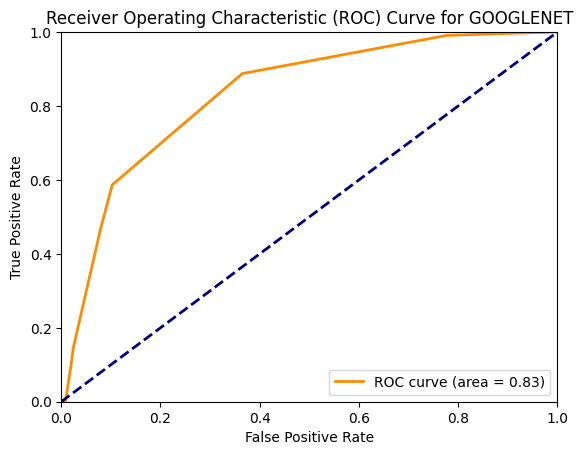

In [246]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
y_true = []
y_pred_prob = []

# Loop through your test batches
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred3 = model5.predict(X)

    # Append the true labels and predicted probabilities to the lists
    y_true.extend(y)
    y_pred_prob.extend(y_pred3)

    # Update metrics (optional, based on your existing code)
    Pre.update_state(y, y_pred3)
    Rec.update_state(y, y_pred3)
    Acc.update_state(y, y_pred3)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)

# Calculate F1 score (optional, based on your existing code)
F1_SCORE = 2 * (Pre.result().numpy() * Rec.result().numpy()) / (Pre.result().numpy() + Rec.result().numpy())

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GOOGLENET')
plt.legend(loc="lower right")
plt.show()


In [1]:
# YOLO implementation

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Reshape
from tensorflow.keras.models import Model

# Define input
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1470, activation='relu')(x)  # This is just an example; adjust according to your needs

# Reshape to match the YOLO output format (7x7 grid, each with B bounding boxes and C classes)
output_layer = Reshape((7, 7, 30))(x)  # Example with 2 bounding boxes and 20 classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    18,878,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1470)           │     6,022,590 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 30)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,473,822 (100.99 MB)

 Trainable params: 26,473,822 (100.99 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from ultralytics import YOLO

In [6]:
# LOAD  YOLO MODEL
model = YOLO("yolov8n.yaml") # Build a new model from scratch

In [7]:
#TRAIN THE MODEL
results = model.train(data = "frank.yaml", epochs  = 1)

Ultralytics YOLOv8.2.29  Python-3.12.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1125G4 2.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=frank.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning C:\Users\HP\PycharmProjects\ComputerVision\Yolo format\data_n\labels\train.cache... 1892 images, 424 backgrounds, 0 corrupt: 100%|██████████| 2193/2193 [00:00<?, ?it/s]
val: Scanning C:\Users\HP\PycharmProjects\ComputerVision\Yolo format\data_n\labels\train.cache... 1892 images, 424 backgrounds, 0 corrupt: 100%|██████████| 2193/2193 [00:00<?, ?it/s]

Plotting labels to runs\detect\train7\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      4.158      5.197      3.494          3        640: 100%|██████████| 138/138 [37:09<00:00, 16.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [10:40<00:00,  9.28s/it]


                   all       2193       5000    0.00194      0.257     0.0504     0.0132

1 epochs completed in 0.800 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 6.2MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics YOLOv8.2.29  Python-3.12.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1125G4 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [08:39<00:00,  7.53s/it]


                   all       2193       5000    0.00194      0.257     0.0506     0.0133
           saloon_cars       1354       2000    0.00192      0.267     0.0405    0.00752
           motorcycles       1412       3000    0.00196      0.248     0.0606      0.019
Speed: 4.6ms preprocess, 220.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs\detect\train7
